# Introduction
An exploration into the [pokemon dataset](https://www.kaggle.com/abcsds/pokemon ) hosted on Kaggel. This dataset includes dataset on: 
* Name,
* Type 1, 
* Type 2, 
* Total,
* HP, 
* Attack, 
* Defence,
* Sp. Atk,
* Sp. Def, 
* Speed, 
* Generation,
* Legendary

Starting at a general level, this project will gradually explore deeper,reviewing key features of the data including type, generation and legendary. As stated on the page hosting the dataset, based on aspects such as Attack and Defense, the type of pokemon cannot be predicted. However, can other features be identified? 


## Import data and libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import chart_studio.plotly as py
import cufflinks as cf

init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
pokemon = pd.read_csv("Pokemon.csv", index_col = "#")

# General Overview of data

In [3]:
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 721
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB


In [5]:
pokemon.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [6]:
pokemon['Type 2'].isnull().sum() 
# 386 entries to be exact

386

In [7]:
pokemon["Name"].nunique()

800

Looking at the information, the majority of the data do not have any null values. However Type 2 is the exception to this with a high number of null values. Also Legendary is a boolean.
Furthermore, based on the review for the number of distinct pokemons and the number of pokemons without a Type 2, we can establish that the dataset holds information on 800 unique pokemon, of which 386 do not have a Type 2.

Examining the total column, indicates that it is a simple sum of the numerical columns 'HP', 'Attack', 'Defence','Sp. Atk', 'Sp. Def', 'Speed'. In other words, the total has no weights towards specific features in favour of others thus there is little merit in constructing a model of these features to predict the total. 

In [8]:
pokemon["check"] = pokemon[['HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis = 1)

pokemon[pokemon["check"]!=pokemon["Total"]].any()

Name          False
Type 1        False
Type 2        False
Total         False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
check         False
dtype: bool

In [9]:
pokemon.drop("check", axis = 1, inplace = True)

## Processing Type 2 data
As the initial review of the data established, there are a number of null values in Type 2. However null values are intentional as not all pokemons have a Type 2. Consequently dropping null values is likely to be unwise. Alternatively, creating a new column which determines whether a pokemon has a second type may prove beneficial.

In [10]:
pokemon["Type 2"]
pokemon['Second Type'] =  np.where(pokemon["Type 2"].isnull(), False, True)

# Exploring specific aspects of data
The results from pokemon.describe() show that there may be some extremely weak pokemon which can be typically harder to handle in combat situations. 

In [11]:
pokemon.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [12]:
pokemon[pokemon["HP"]==1]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Second Type
#,,,,,,,,,,,,,
292,Shedinja,Bug,Ghost,236,1,90,45,30,30,40,3,False,True


Investigating the data, the pokemon with the lowest HP is Shedinja. In addition, it has low stats for Defence Sp. Atk, Sp.Def and Speed, further reinforcing that it is a harder pokemon to use in gameplay. That being said, Shedinja’s Attack of 90, is higher than over 50% of the pokemons in this dataset.

In contrast  it is clear that Shedinja is not responsible for the min combat (Attack and Defence) data. 

In [13]:
pokemon[pokemon["Attack"]< 6]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Second Type
#,,,,,,,,,,,,,
113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False,False
440,Happiny,Normal,NaN,220,100,5,5,15,65,30,4,False,False


Chansey and Happiny are these pokemons. They are the lowest performing pokemon in terms of both Attack and Defence and can be confirmed by rerunning the code for defence. One aspect to note is that although Chansey and Happiny have the same Defence and attack values, as Shedinja's records indicate, this is not always the case. This will be further explored in the visualisation section of this project. 


In [14]:
pokemon[pokemon["Defense"]< 6]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Second Type
#,,,,,,,,,,,,,
113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False,False
440,Happiny,Normal,NaN,220,100,5,5,15,65,30,4,False,False


Overall, none of these pokemon have the weakest total stat. Sunkern is this overall weakest pokemon. 

In [15]:
pokemon[pokemon["Total"]==180]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Second Type
#,,,,,,,,,,,,,
191,Sunkern,Grass,NaN,180,30,30,30,30,30,30,2,False,False


# Visualising the data
## Distribution of the stats
Continuing with the review of the basic stats, below are graphs showing the distribution of the core stats HP, Attack and Defence are distributed. As the graphs below show, that the data has a normal to a right skew. Therefore for a given pokemon, its attack is around 50-100. There are pokemons which have much higher attacks but the majority are around the 50-100 if not lower. This is justified as an aspect of the gameplay involves training the pokemons. Consequently if a pokemon has high stats at the start, the merit of this aspect of gameplay would be undermined. 


<Figure size 864x720 with 0 Axes>

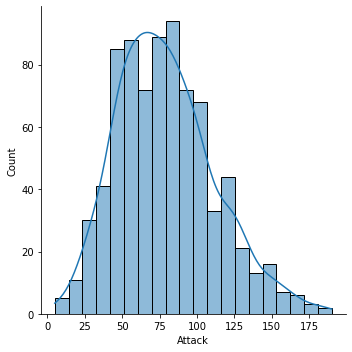

In [16]:
plt.figure(figsize=(12,10))
sns.displot(x = "Attack", data = pokemon, kde = True)

<Figure size 864x720 with 0 Axes>

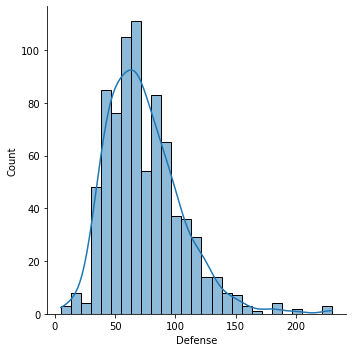

In [17]:
plt.figure(figsize=(12,10))
sns.displot(x = "Defense", data = pokemon, kde = True)

<Figure size 864x720 with 0 Axes>

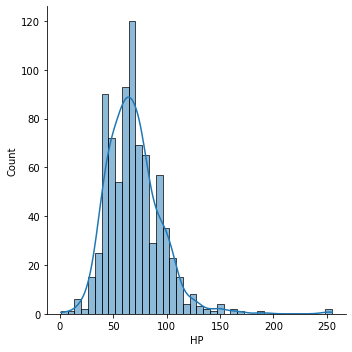

In [18]:
plt.figure(figsize=(12,10))
sns.displot(x = "HP", data = pokemon, kde = True)

For the Total, however, skewed by the other variables, it shows that there are two peaks in the data. This may be due to the movements in the variables relating to speed. 

<Figure size 864x720 with 0 Axes>

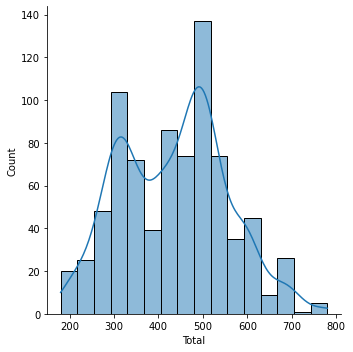

In [19]:
plt.figure(figsize=(12,10))
sns.displot(x = "Total", data = pokemon, kde = True)

## Types

### Type 1
Another key aspect of gameplay has been the types and its performance against other types.  
The graphic representation of the data highlights that Type 1 variables are not evenly distributed.

Text(0.5, 0.98, 'Rank of the type 1 pokemons')

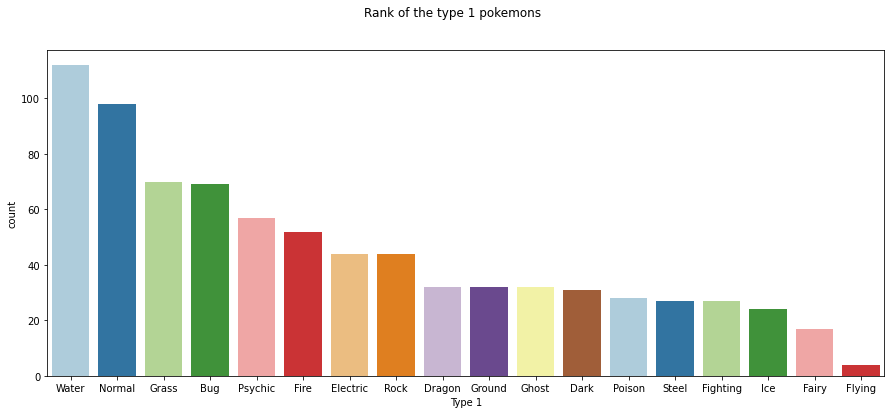

In [20]:
plt.figure(figsize=(15,6))
sns.countplot(x="Type 1", data=pokemon, order = pokemon['Type 1'].value_counts().index, palette = "Paired")
plt.suptitle("Rank of the type 1 pokemons")


Wind and Normal pokemons dominate this dataset. In other words, players are more likely to encounter Wind pokemons over other types. In contrast, capturing a Fairy or Flying type pokemons may prove difficult. 

Expanding the scope to include Type 2, it is clear that this too is not evenly distributed. Capturing a Wind pokemon will indeed lead to a good chance it will have a Type 2. However, if the player captures a Normal pokemon, the probability drops significantly. If a player wishes to secure a pokemon with a Type 2, they are best placed in looking for it in an area prominent with Bug type pokemons. Bug and Rock type pokemons are some of the most likely to have a Type 2. Alternatively, the player might find that securing a Bug and Rock pokemon with no Type 2 may be challenging.  


Text(0.5, 0.98, 'Rank of the type 1 pokemons ')

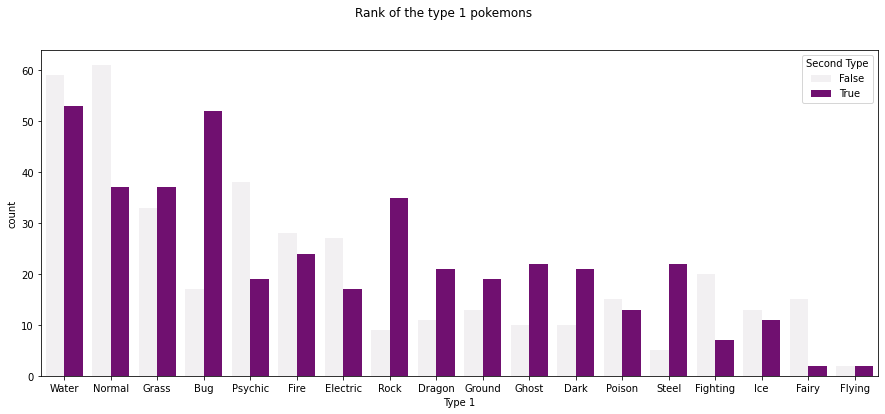

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(x="Type 1", hue = "Second Type", data=pokemon, order = pokemon[ "Type 1"].value_counts().index, color = "purple")
plt.suptitle("Rank of the type 1 pokemons ")

In terms of ability, as stated previously, some types perform better against others. That being said, as per the box plot below, certain pokemon types appear to have better over stats than other types. For instance, Dragon pokemons on average tend to have a total average of 550 whilst Grass pokemons tend to have a total average of around 425. 

<AxesSubplot:xlabel='Type 1', ylabel='Total'>

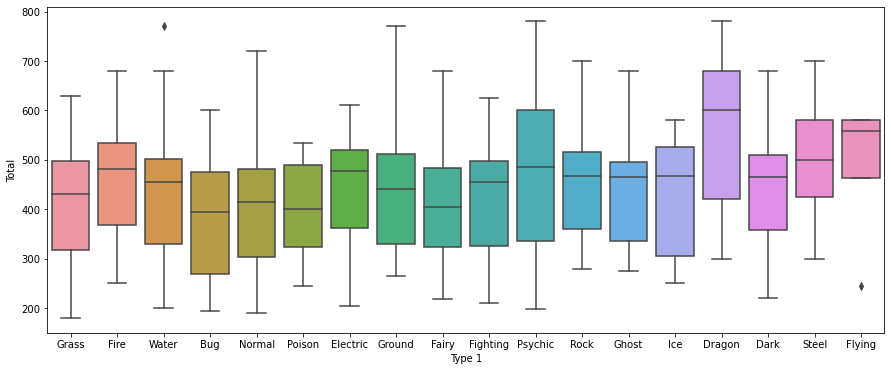

In [22]:
plt.figure(figsize=(15,6))
sns.boxplot(x = "Type 1", y = "Total", data = pokemon)

### Type 2
Looking deeper at the Type 2 data and the related second type column, the following observations can be made.

Firstly, provided that a pokemon has a Type 2, the elements in this category will be distributed as follows. 


Text(0.5, 0.98, 'Rank of the type 2 pokemons')

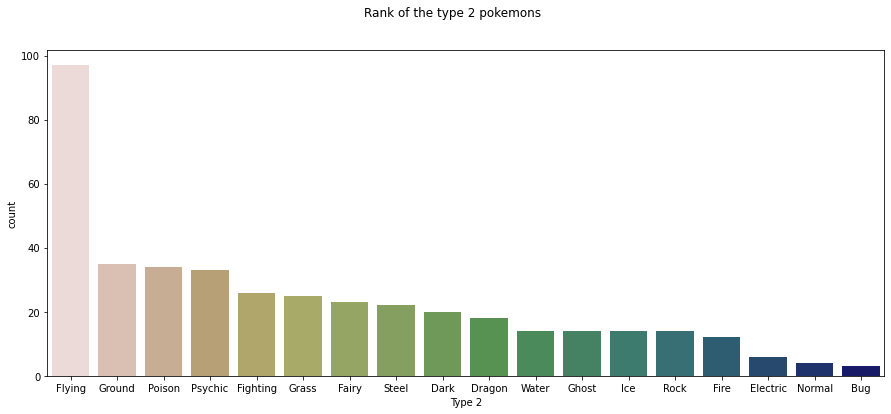

In [23]:
plt.figure(figsize=(15,6))
sns.countplot(x="Type 2", data=pokemon, order = pokemon['Type 2'].value_counts().index, palette = "gist_earth_r")
plt.suptitle("Rank of the type 2 pokemons")


Replicating the Type 1 investigation with Type 2 data, excluding null values, the above graphical distribution can be observed.
The most common Type 2 element is Flying rather than Bug type. Therefore, for some elements, whilst they are a popular category for Type 1, they are rare in Type 2.

Finally, reviewing the Second Type against Attack and Defence, it appears that having a Decond type may lead to the pokemon being stronger in these two factors. The blue dots (no Second Type) appear to be spread a little lower than the orange dots (with Second Type)

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

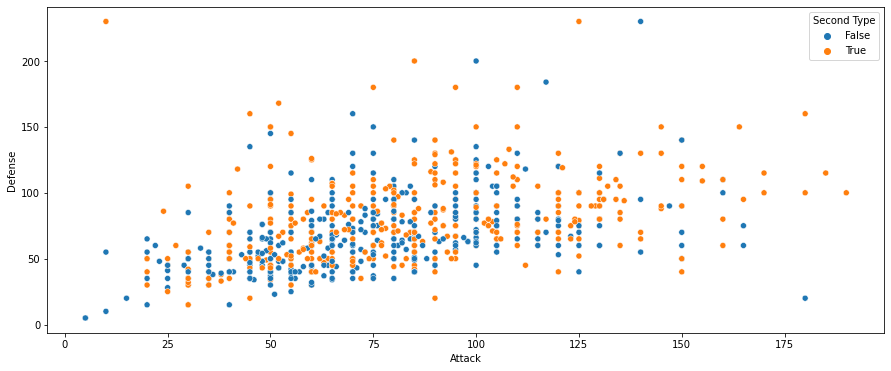

In [24]:
plt.figure(figsize=(15,6))

sns.scatterplot(x ="Attack", y = "Defense", data = pokemon, hue = "Second Type",  )

## Further review of Type 1 and Type 2

### Water Pokemons
Diving deeper into the two elements, it may be wise to explore the data for a specific Type 1 pokemon. As the Water is a popular element for Type 1, this element has been selected for this analysis. 

In [25]:
Water = pokemon[pokemon["Type 1"] == "Water"].fillna("No type")

Text(0.5, 0.98, 'Type 2 data for Water pokemons in descending order')

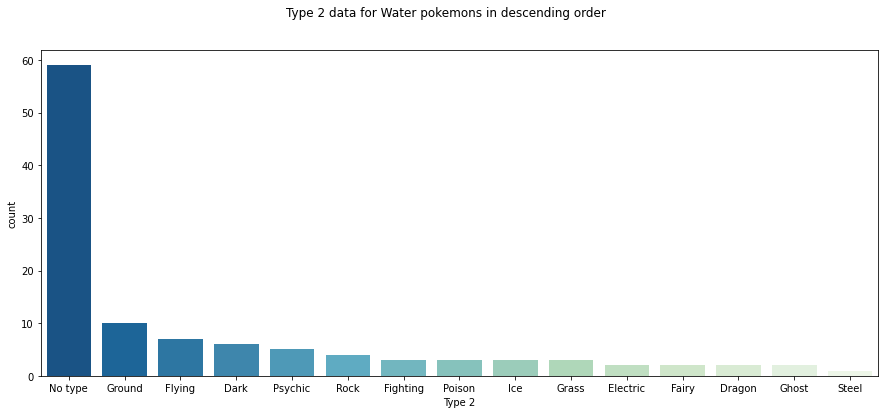

In [26]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Type 2", data = Water, palette ="GnBu_r", order = Water['Type 2'].value_counts().index)
plt.suptitle("Type 2 data for Water pokemons in descending order")

Highlighted by the above graph and previous graphs, for a given Water pokemon, it is most likely to not have a Type 2. If a player is fortunate to capture a pokemon with a second type, this is likely to be Ground or Flying. Water pokemons with a Type 2 of Steel appear to be extremely rare. There is only one such pokemon, Empoleon. 

In [27]:
pokemon[(pokemon["Type 1"] == "Water") & (pokemon["Type 2"] == "Steel") ]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Second Type
#,,,,,,,,,,,,,
395,Empoleon,Water,Steel,530,84,86,88,111,101,60,4,False,True


Moreover, for Water pokemons, the majority of the pokemons appears to have been added during the 1st and 3rd generation. 

Text(0.5, 0.98, 'Generation distribution for water type pokemon')

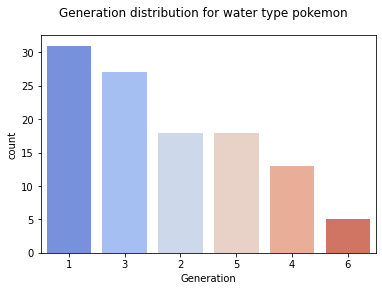

In [28]:
sns.countplot(x = "Generation" , data = Water, palette ="coolwarm", order = Water['Generation'].value_counts().index)
plt.suptitle("Generation distribution for water type pokemon")

### Dragon Pokemons

Whilst the generation data is interesting, it may be wise to explore one additional element to consider whether they share features. In the boxplot, as the Dragon types performed extremely well, perhaps these pokemons would be best suited for this. They are also one of the elements which appeared to be relatively harder to capture due to the number of individual pokemons with this type. 


In [29]:
Dragon = pokemon[pokemon["Type 1"] == "Dragon"].fillna("No type")

Unlike the Water pokemons, the majority of the Dragon pokemons were introduced during the 3rd and 5th generation.

Text(0.5, 0.98, 'Generation distribution for Dragon type pokemon')

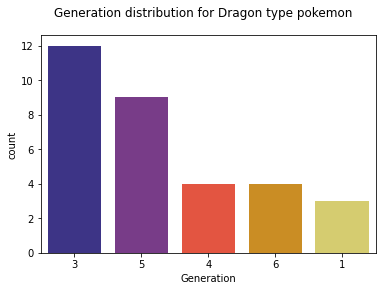

In [30]:
sns.countplot(x = "Generation" , data = Dragon, palette ="CMRmap", order = Dragon['Generation'].value_counts().index)
plt.suptitle("Generation distribution for Dragon type pokemon")

Furthermore as overall the number of pokemons with Dragon types is low, the distribution of Types 2 is not as stark as that for Water pokemons.

Text(0.5, 0.98, 'Type 2 data for Dragon pokemons in descending order')

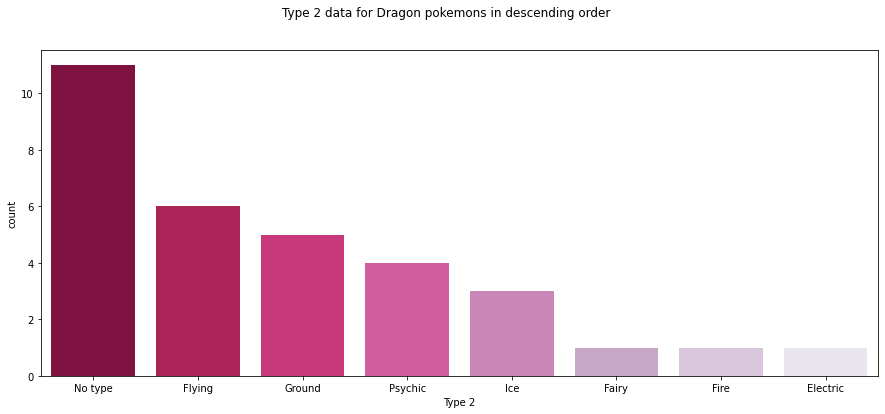

In [31]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Type 2", data = Dragon, palette ="PuRd_r", order = Dragon['Type 2'].value_counts().index)
plt.suptitle("Type 2 data for Dragon pokemons in descending order")

## Generation

As identified through the exploration of specific Type 1 catogories, it is clear that throughout the generations,  types were not increased in the quantities and in some generations certain Type 1 of pokemons were introduced more over other types. 
Some distributions established in generation 1 have persisted. For instance, There were a high number of Wind and Normal pokemons in generation 1 and this characteristic has remained prominted that it can be observed in the overall dataset too.
In contrast, the proportion of the Fire pokemon in the dataset as changed significantly in the years after generation 1 in favour of Grass and Bug pokemon types.

In [32]:
gen1 = pokemon[pokemon["Generation"] == 1]

Text(0.5, 0.98, 'Rank of the type 1 pokemons in generation 1')

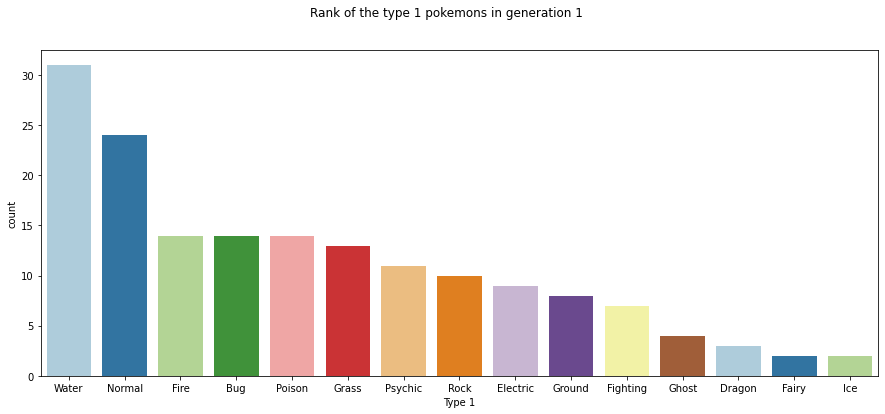

In [33]:
plt.figure(figsize=(15,6))
sns.countplot(x="Type 1", data=gen1, order = gen1['Type 1'].value_counts().index, palette = "Paired")
plt.suptitle("Rank of the type 1 pokemons in generation 1")


Returning to the previous countplot for type 1, and accounting for generations, this change can be clearly observed. For instance, in generation 6, the number of Ghost pokemon was drastically increased alongside Fairy types. Meanwhile, Wind, Normal and Poison, to mention a few,  saw marginal increases in their number in the same generation. 

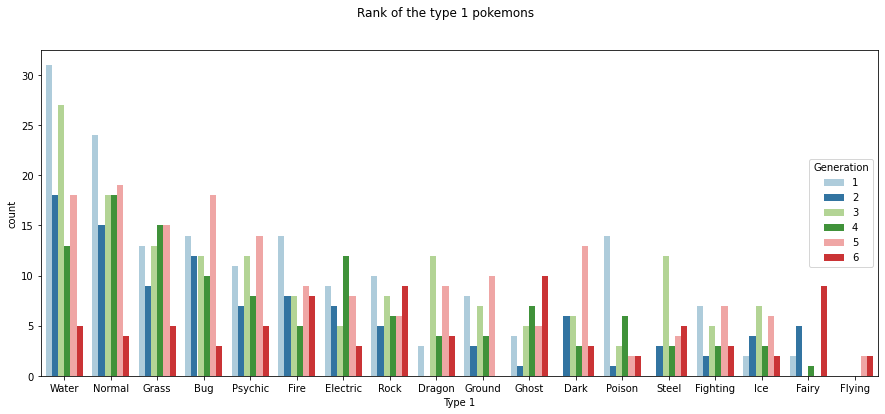

In [47]:
plt.figure(figsize=(15,6))
sns.countplot(x="Type 1", data=pokemon,  hue = "Generation", order = pokemon['Type 1'].value_counts().index, palette = "Paired")
plt.suptitle("Rank of the type 1 pokemons")
plt.legend(loc='center right', title ="Generation" )

## Legendary Pokemons
The final section of this project explores  the boolean column, Legendary. 
There are 65 pokemons of this rank and therefore make up a relatively small proportion of the dataset. However, when this element is taken into account, it is clear that pokemons with this characteristic perform better than those without this feature. 

In [60]:
sum(pokemon["Legendary"] == True)

65

Text(0.5, 0.98, 'Spread of Type 1 vs Total data separated by Legendary')

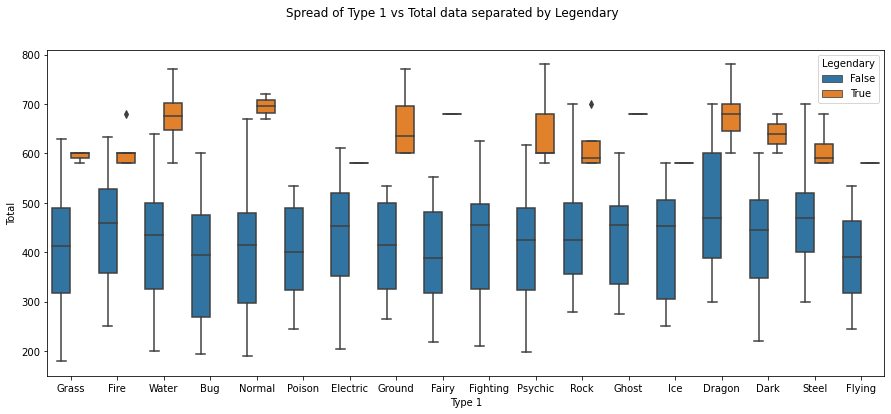

In [35]:
plt.figure(figsize=(15,6))
sns.boxplot(x = "Type 1", y = "Total", data = pokemon, hue = "Legendary")
plt.suptitle("Spread of Type 1 vs Total data separated by Legendary")
# Regardless of the type of pokemon, if you secure a legendary pokemon, it is likely to have signficantly better total stats than non legendary pokemons

For instance, for the total stats, all the Legendary pokemons performed significantly better than those which were not regardless of if they shared the same Type 1 element.

Likewise this is mirrored in the data for HP and a number of other characteristics. (*Some of the graphs were created to be interactive to ensure that the data was more readable.*) 

Text(0.5, 0.98, 'Type 1 vs HP separated by Legendary')

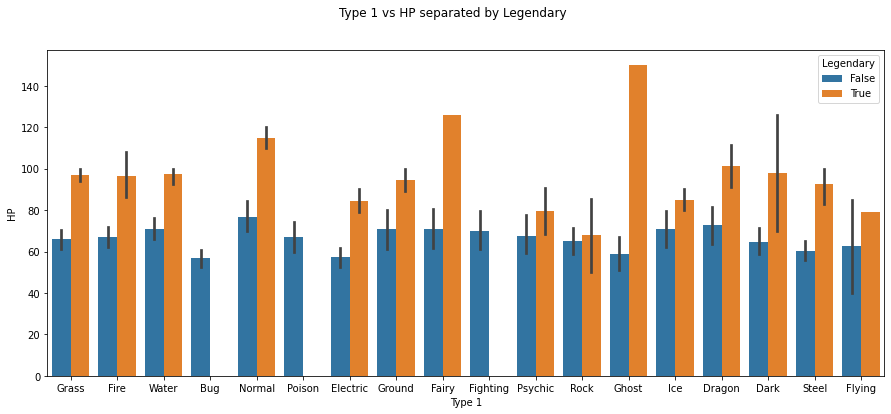

In [36]:
plt.figure(figsize=(15,6))
sns.barplot(x = "Type 1", y = "HP", data = pokemon, hue = "Legendary")
plt.suptitle("Type 1 vs HP separated by Legendary")

Text(0.5, 0.98, 'Scatter of Attack vs Defense separated by Legendary, Fig 1')

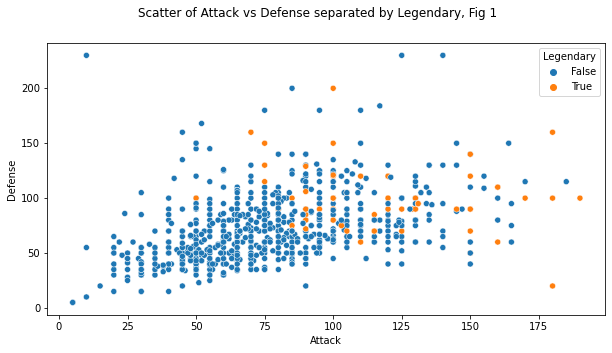

In [37]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = "Attack", y= "Defense", hue = "Legendary", data = pokemon,)
plt.suptitle("Scatter of Attack vs Defense separated by Legendary, Fig 1")

In [38]:
import plotly.express as px
fig = px.scatter(pokemon,x = "Attack", y= "Defense", color="Legendary",  title = "Scatter of Attack vs Defense separated by Legendary, Fig 2")
fig.show()

In [39]:
import plotly.express as px
fig = px.scatter(pokemon,x = "Total", y= "Sp. Def", color="Legendary", title = "Scatter of Total vs Sp. Def separated by Legendary")
fig.show()

In [40]:
import plotly.express as px
fig = px.scatter(pokemon,x = "HP", y= "Defense", color="Legendary", title = "Scatter of HP vs Defense separated by Legendary")
fig.show()

These distribution of stats suggest that based on certain factors, players maybe be able to identify if it is more likely to be a Legendary pokemon or not. 

# Conclusion
In conclusion, this was an interesting dataset to explore. It is also wise to acknowledge that there are limitations to this data. One aspect is that the data may be out of date based on the generation data as well as the conversation around this dataset. 

Moreover, it does not contain data on how many of each pokemon a player can encounter.As such the conclusions drawn are based on the assumption that the population of each type of pokemon is the same. However, the gameplays suggest this may not be the case. 

Based on the findings relating to the Legendary data, a model could be created to prodict if a given pokemon falls into this group or not. I may return to this dataset at a later date and attempt to create such a model.

*“I see now that the circumstances of one's birth are irrelevant. It is what you do with the gift of life that determines who you are.”*
― [Takeshi Shudo, The Art of Pokemon, the Movie: Mewtwo Strikes Back!](https://www.goodreads.com/quotes/tag/pokemon)